In [1]:
import os
import glob

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict


exact_tour_weights = {
    'a280' : 2579,
    'ali535' : 202310,
    'att48' : 10628,
    'att532' : 27686,
    'bayg29' : 1610,
    'bays29' : 2020,
    'berlin52' : 7542,
    'bier127' : 118282,
    'brazil58' : 25395,
    'brd14051' : [468942,469445],
    'brg180' : 1950,
    'burma14' : 3323,
    'ch130' : 6110,
    'ch150' : 6528,
    'd198' : 15780,
    'd493' : 35002,
    'd657' : 48912,
    'd1291' : 50801,
    'd1655' : 62128,
    'd2103' : [79952,80450],
    'd15112' : [1564590,1573152],
    'd18512' : [644650,645488],
    'dantzig42' : 699,
    'dsj1000' : 18659688,
    'eil51' : 426,
    'eil76' : 538,
    'eil101' : 629,
    'fl417' : 11861,
    'fl1400' : 20127,
    'fl1577' : [22204,22249],
    'fl3795' : [28723,28772],
    'fnl4461' : 182566,
    'fri26' : 937,
    'gil262' : 2378,
    'gr17' : 2085,
    'gr21' : 2707,
    'gr24' : 1272,
    'gr48' : 5046,
    'gr96' : 55209,
    'gr120' : 6942,
    'gr137' : 69853,
    'gr202' : 40160,
    'gr229' : 134602,
    'gr431' : 171414,
    'gr666' : 294358,
    'hk48' : 11461,
    'kroA100' : 21282,
    'kroB100' : 22141,
    'kroC100' : 20749,
    'kroD100' : 21294,
    'kroE100' : 22068,
    'kroA150' : 26524,
    'kroB150' : 26130,
    'kroA200' : 29368,
    'kroB200' : 29437,
    'lin105' : 14379,
    'lin318' : 42029,
    'linhp318' : 41345,
    'nrw1379' : 56638,
    'p654' : 34643,
    'pa561' : 2763,
    'pcb442' : 50778,
    'pcb1173' : 56892,
    'pcb3038' : 137694,
    'pla7397' : 23260728,
    'pla33810' : [65913275,66116530],
    'pla85900' : [141904862,142487006],
    'pr76' : 108159,
    'pr107' : 44303,
    'pr124' : 59030,
    'pr136' : 96772,
    'pr144' : 58537,
    'pr152' : 73682,
    'pr226' : 80369,
    'pr264' : 49135,
    'pr299' : 48191,
    'pr439' : 107217,
    'pr1002' : 259045,
    'pr2392' : 378032,
    'rat99' : 1211,
    'rat195' : 2323,
    'rat575' : 6773,
    'rat783' : 8806,
    'rd100' : 7910,
    'rd400' : 15281,
    'rl1304' : 252948,
    'rl1323' : 270199,
    'rl1889' : 316536,
    'rl5915' : [565040,565530],
    'rl5934' : [554070,556045],
    'rl11849' : [920847,923368],
    'si175' : 21407,
    'si535' : 48450,
    'si1032' : 92650,
    'st70' : 675,
    'swiss42' : 1273,
    'ts225' : 126643,
    'tsp225' : 3919,
    'u159' : 42080,
    'u574' : 36905,
    'u724' : 41910,
    'u1060' : 224094,
    'u1432' : 152970,
    'u1817' : 57201,
    'u2152' : 64253,
    'u2319' : 234256,
    'ulysses16' : 6859,
    'ulysses22' : 7013,
    'usa13509' : [19947008,19982889],
    'vm1084' : 239297,
    'vm1748' : 336556,
}

all_solution_names = [
    "NearestNeighbour",
    "MinimumSpanningTree",
    "NaiveSolution",
    "GeneticAlgorithm",
    "BranchAndBound"
]

In [2]:
def print_test_from_filename(test_name):
    fpath = os.path.join(os.getcwd(), "datasets", test_name + ".tsp")
    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
        
        start = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
                    
        for i in range(len(content)):
            if content[i] == "NODE_COORD_SECTION":
                start = i + 1;
                
        if start == 0:
            return None;
        return content[start:-1]
    
def print_test_from_filepath(fpath):    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
            
        
        start = 0;
        content_size = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
            
            tokens = content[i].split(":")
            for token in tokens:
                token = token.strip()
            
            if tokens[0] == "DIMENSION":
                content_size = int(tokens[1])
            
            if content[i] == "NODE_COORD_SECTION" or content[i] == "DISPLAY_DATA_SECTION":
                start = i + 1;
                break;
                
        if start == 0:
            return None;
        
        content = content[start:]
    
        if content_size != len(content):
            new_content = []
            for line in content:
                if line != "EOF" and len(line) > 4:
                    new_content.append(line)
            return new_content
        
        return content
    

In [3]:
def get_x_and_y(content, fpath):
    x = []
    y = []
    for line in content:
        tokens = line.split()
        if (len(tokens) != 3):
            print()
            print("invalid tokens: ", fpath, tokens)
        x.append(float(tokens[1]))
        y.append(float(tokens[2]))
        
    return x, y

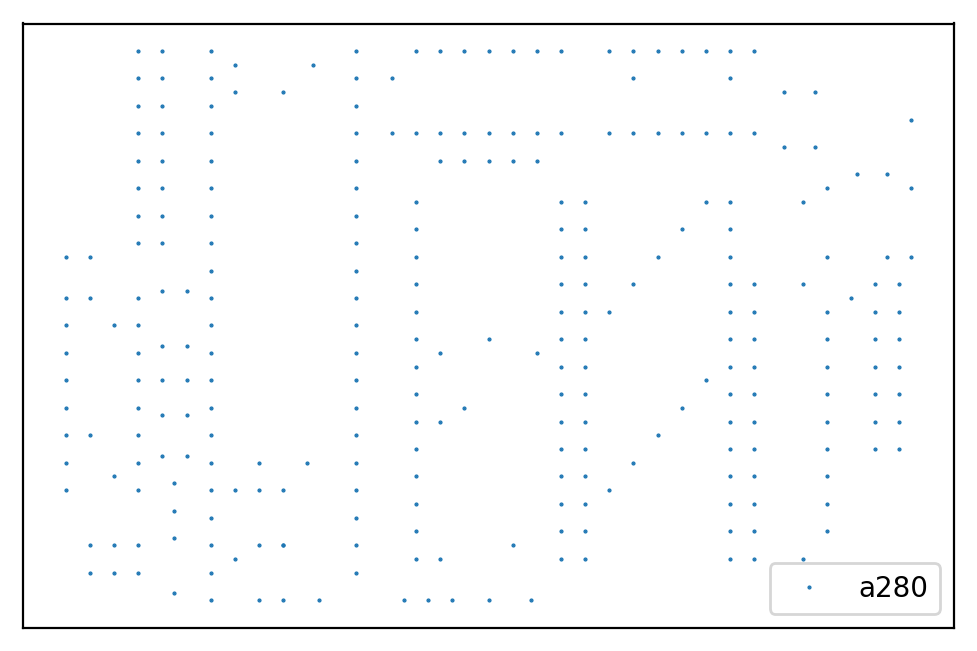

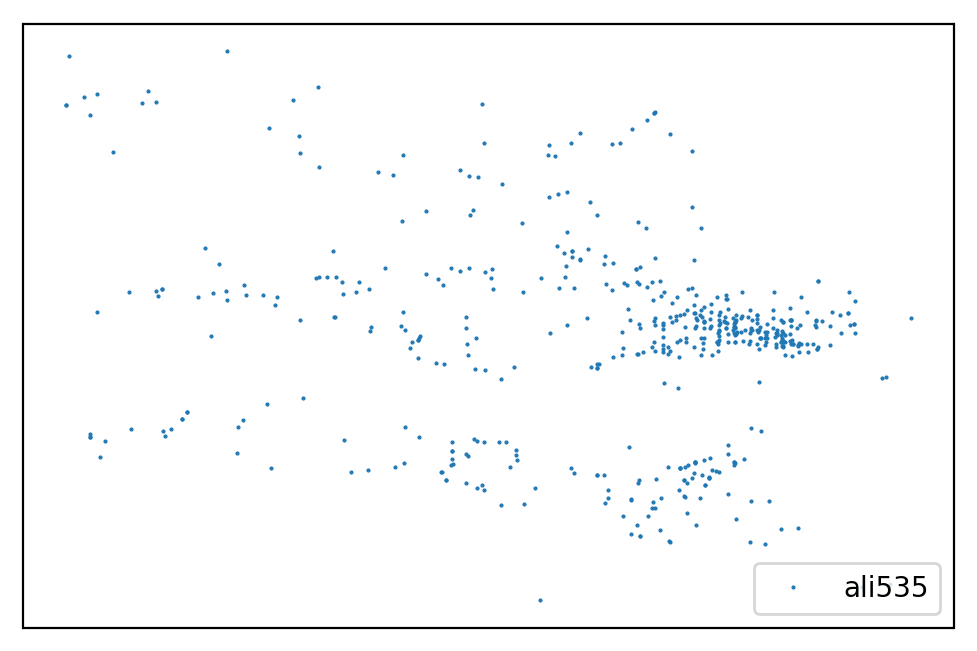

In [5]:
all_test_paths = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", "*.tsp")))
tests_amount = len(all_test_paths)
tests_amount = 2

for i in range(tests_amount):
    points = print_test_from_filepath(all_test_paths[i])
    test_name = all_test_paths[i].split("/")[-1][:-4];
    if (points != None):
        x, y = get_x_and_y(points, all_test_paths[i])

        fig, ax = plt.subplots(dpi=200)
        
        plt.plot(x, y, 'o', marker='.', markersize=1, scalex=True, scaley=True, label=test_name)
        plt.legend(loc='lower right')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()
    else:
        print("matrix in test {}".format(test_name))
        
        

In [6]:
def print_tour_from_filepath(fpath):    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
            
        
        start = 0;
        content_size = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
            
            tokens = content[i].split(":")
            for token in tokens:
                token = token.strip()
            
            if tokens[0] == "DIMENSION":
                content_size = int(tokens[1])
            
            if content[i] == "TOUR_SECTION":
                start = i + 1;
                break;
                
        if start == 0:
            return None;
        
        content = content[start:]
    
        if content_size != len(content):
            new_content = []
            for line in content:
                if line != "EOF" and int(line) != -1:
                    new_content.append(line)
                    
            print("size ", len(new_content), content_size)
            return new_content
        
        return content
    
def get_best_weight_for_test_solution(test, solution):
    solution_tour_paths = sorted(glob.glob(os.path.join(os.getcwd(), "results", 
                                                       test + "_" + solution + "_" + "*.tour")), key=str.lower)
    best_weight = defaultdict(lambda : 10**18)
    time_ms_best = defaultdict(lambda : 10**18)
    for fpath in solution_tour_paths:
        if not os.path.isfile(fpath):
            print('File does not exist.')
        else:
            with open(fpath) as f:
                content = f.read().splitlines()
                weight = 10**18
                optimizer = ''
                time_ms = None
                for i in range(len(content)):
                    if(content[i].count('WEIGHT')):
                        weight =int(content[i].split(':')[-1].strip())
                    if content[i].count('OPTIMIZER'):
                        optimizer = content[i].split(':')[-1].strip()
                    if content[i].count('TIME'):
                        time_ms = float(content[i].split(':')[-1].strip())
                if weight < best_weight[optimizer]:
                    best_weight[optimizer] = weight
                    time_ms_best[optimizer] = time_ms
                
    return best_weight, time_ms_best   

In [7]:
def get_number(path):
    return int(path.split("_")[-1].split(".")[0])
    
def plot_tour_by_testname_and_solution(testname, solution):
    tour_path = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", testname + ".opt.tour")))[-1]
    solution_tour_path = sorted(glob.glob(os.path.join(os.getcwd(), "results", 
                                                       testname + "_" + solution + "_" + "*.tour")), key=get_number)[-1]
    
    test_path = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", testname + ".tsp")))[-1]
    print(solution_tour_path, tour_path, test_path)

    points = print_test_from_filepath(test_path)
    permute = print_tour_from_filepath(tour_path)
    our_permute = print_tour_from_filepath(solution_tour_path)


    if(tour_path == None or solution_tour_path == None or test_path == None):
        print("smth is None")
        print(test_path, tour_path, solution_tour_path)
        return 

    if (points != None):
        x, y = get_x_and_y(points, test_path)
        new_x = []
        new_y = []
        for index in permute:
            v = int(index)
            new_x.append(x[v - 1])
            new_y.append(y[v - 1])
        new_x.append(new_x[0])
        new_y.append(new_y[0])

        our_x = []
        our_y = []
        for index in our_permute:
            v = int(index)
            our_x.append(x[v])
            our_y.append(y[v])
        our_x.append(our_x[0])
        our_y.append(our_y[0])
        
        from math import sqrt
        res = 0
        for i in range(len(our_x) - 1):
            res += int(sqrt((our_x[i] - our_x[i + 1]) ** 2 + (our_y[i] - our_y[i + 1]) ** 2) + 0.5)
        print('res ~= ', res)
        
        assert len(our_permute) == len(permute)
        assert sorted(list(set(our_permute))) == sorted(our_permute)

        fig, ax = plt.subplots(dpi=170)

        plt.plot(new_x, new_y, 
                 linewidth=0.4, 
                 marker='.', markersize=1, 
                 color="#673ab7",
                 markeredgecolor="black",
                 label=testname + ' tour')

        plt.plot(our_x, our_y, 
                 linewidth=0.4, 
                 marker='.', markersize=1, 
                 color="#4cd964",
                 markeredgecolor="black",
                 label=testname + ' ' + solution)

        plt.legend(loc='lower right', prop={'size': 4})
        plt.xticks([], [])
        plt.yticks([], [])

        plt.show()
    else:
        print("matrix in test {}".format(testname))
            
# todo: search by test name all solution in results

In [8]:
plt.savefiga

/Users/gwyrwch/Projects/course-work-5/results/a280_BranchAndBound_3.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.tsp
size  280 0
size  280 280
res ~=  3144


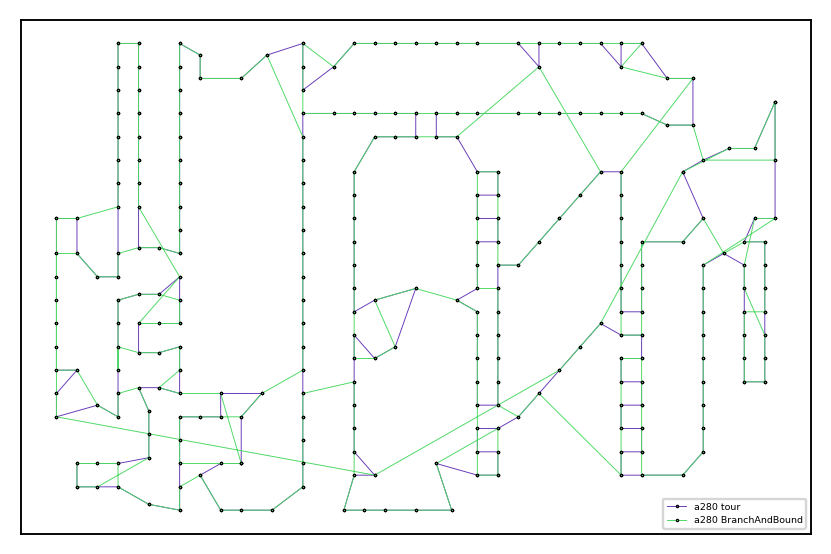

/Users/gwyrwch/Projects/course-work-5/results/tsp225_BranchAndBound_3.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.tsp
size  225 0
size  225 225
res ~=  4951


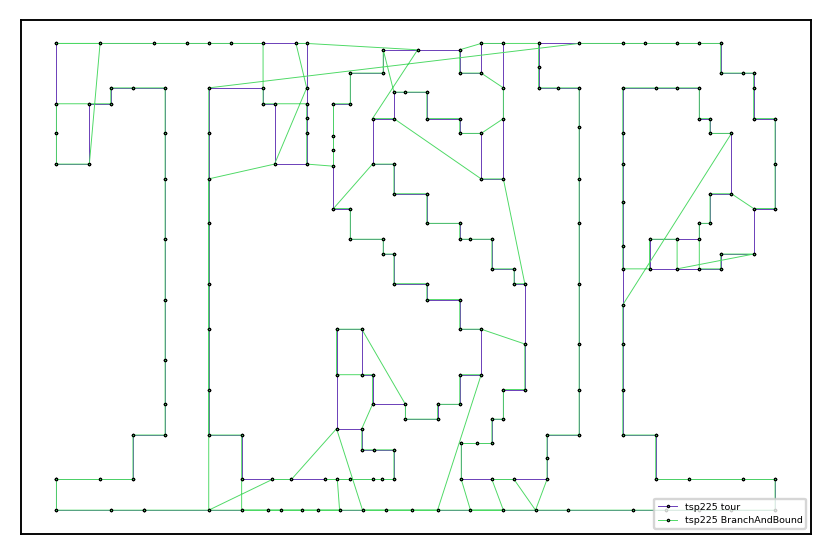

In [108]:
plot_tour_by_testname_and_solution('a280', 'BranchAndBound')
plot_tour_by_testname_and_solution('tsp225', 'BranchAndBound')

/Users/gwyrwch/Projects/course-work-5/results/a280_GeneticAlgorithm_1.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.tsp
size  280 0
size  280 280
res ~=  13274


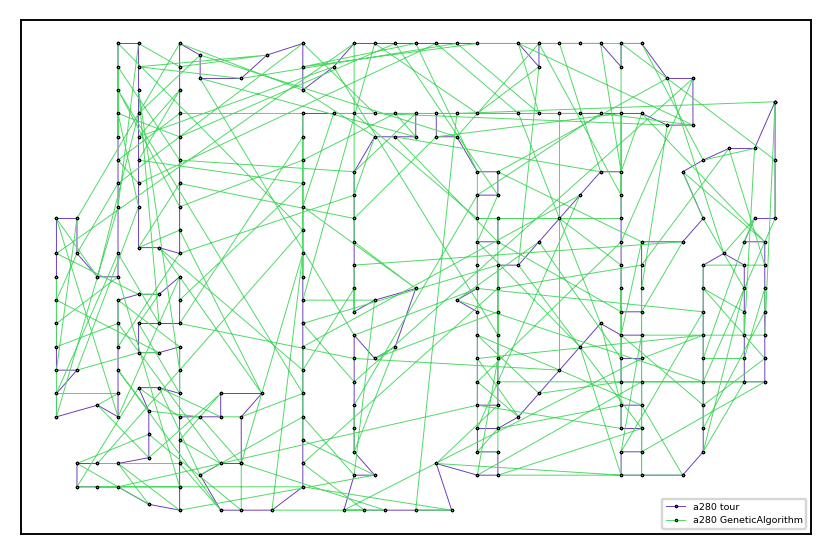

In [109]:
plot_tour_by_testname_and_solution('a280', 'GeneticAlgorithm')

/Users/gwyrwch/Projects/course-work-5/results/att48_GeneticAlgorithm_1.tour /Users/gwyrwch/Projects/course-work-5/datasets/att48.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/att48.tsp
size  48 0
size  48 48
res ~=  33554


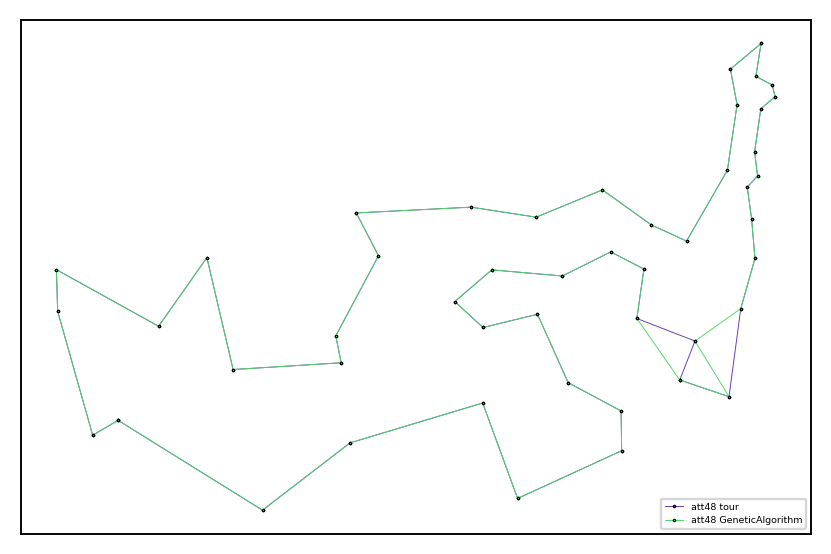

In [110]:
plot_tour_by_testname_and_solution('att48', 'GeneticAlgorithm')

/Users/gwyrwch/Projects/course-work-5/results/ch130_NaiveSolution_4.tour /Users/gwyrwch/Projects/course-work-5/datasets/ch130.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/ch130.tsp
size  130 0
size  130 130
res ~=  12531


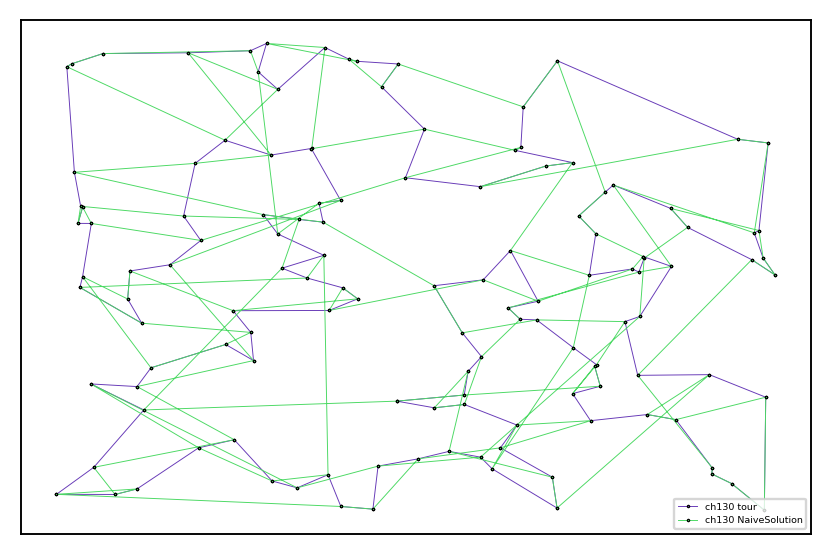

In [111]:
plot_tour_by_testname_and_solution('ch130', 'NaiveSolution')

/Users/gwyrwch/Projects/course-work-5/results/bayg29_NearestNeighbour_5.tour /Users/gwyrwch/Projects/course-work-5/datasets/bayg29.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/bayg29.tsp
size  29 0
size  29 29
res ~=  9073


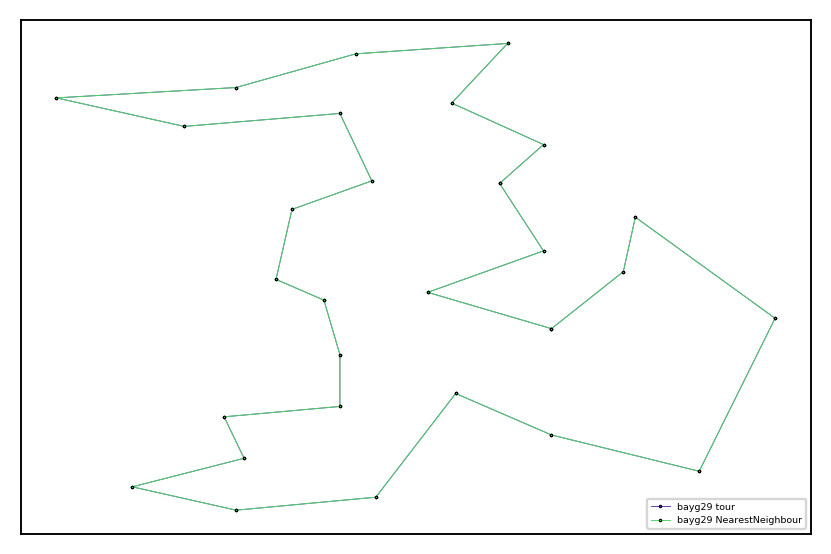

In [112]:
plot_tour_by_testname_and_solution('bayg29', 'NearestNeighbour')

In [113]:
def get_score_for_solution(solution):
    solution_tour_paths = sorted(glob.glob(os.path.join(os.getcwd(), "results", 
                                                       "*_" + solution + "_" + "*.tour")), key=str.lower)
    
    if (len(solution_tour_paths) == 0):
        return []
    all_test_names = list(set([path.split("_")[0].split("/")[-1] for path in solution_tour_paths]))
    
    my_weight = defaultdict(int)
    test_names = defaultdict(list)
    time_ms = defaultdict(list)
    
    for test in all_test_names:
        best_weights, times = get_best_weight_for_test_solution(test, solution)
        for opt, w in best_weights.items():
            my_weight[opt] += w
            test_names[opt] += [test]
            time_ms[opt] += [times[opt]]

    # solution, {LocalSearch: 15, '': 20}
    
    result = []
    for opt, weight in my_weight.items():
        exact = 0
        for test_name in test_names[opt]:
            if type(exact_tour_weights[test_name]) == int:
                exact += exact_tour_weights[test_name]
            else:
                continue
        times = np.array(time_ms[opt])
        result += [(opt, (weight - exact) / exact, ', '.join(test_names[opt]), times.min(), times.max(), times.sum() / len(times))]
    return result

In [114]:
cols = ["solution", "optimizer", "score", "test_run", "time_ms_min", "time_ms_max", "time_ms_avg"]
df = pd.DataFrame(columns=cols)
for solution in all_solution_names:
    scores = get_score_for_solution(solution)
    for opt, score, test_names, time_min, time_max, time_avg in scores:
        df = pd.concat([df, pd.DataFrame([[solution, opt, score, test_names, time_min, time_max, time_avg]], columns=cols)], axis=0)
df = df.sort_values(by='score')
df = df.set_index(np.arange(0, df.shape[0]))
df

,solution,optimizer,score,test_run,time_ms_min,time_ms_max,time_ms_avg
0,NearestNeighbour,LocalSearch,5.427151,"dantzig42, kroA100, gr24, d1291, fl1400, rd400...",3000.0,78104.0,3926.378378
1,NearestNeighbour,SimulatedAnnealing,5.742388,"dantzig42, kroA100, gr24, d1291, fl1400, rd400...",3000.0,76088.0,3899.567568
2,NearestNeighbour,,5.895183,"dantzig42, kroA100, gr24, d1291, fl1400, rd400...",0.0,77659.0,960.153153
3,NaiveSolution,LocalSearch,6.862175,"dantzig42, kroA100, gr24, d1291, fl1400, rd400...",6000.0,6006.0,6000.198198
4,MinimumSpanningTree,SimulatedAnnealing,53.531767,"dantzig42, kroA100, gr24, d1291, fl1400, rd400...",3000.0,13164.0,3377.153153
5,NaiveSolution,SimulatedAnnealing,53.621755,"dantzig42, kroA100, gr24, d1291, fl1400, rd400...",6000.0,6005.0,6000.153153
6,MinimumSpanningTree,,53.771919,"dantzig42, kroA100, gr24, d1291, fl1400, rd400...",0.0,9926.0,380.495495
7,NaiveSolution,,69.352970,"dantzig42, kroA100, gr24, d1291, fl1400, rd400...",3000.0,3004.0,3000.117117
8,GeneticAlgorithm,SimulatedAnnealing,840.650485,"dantzig42, kroA100, gr24, d1291, fl1400, rd400...",6000.0,45020.0,7442.531532
9,BranchAndBound,SimulatedAnnealing,846.080697,"dantzig42, kroA100, gr24, d1291, fl1400, rd400...",3001.0,8733.0,5946.828829


/Users/gwyrwch/Projects/course-work-5/results/eil76_MinimumSpanningTree_5.tour /Users/gwyrwch/Projects/course-work-5/datasets/eil76.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/eil76.tsp
size  76 0
size  76 76
res ~=  678


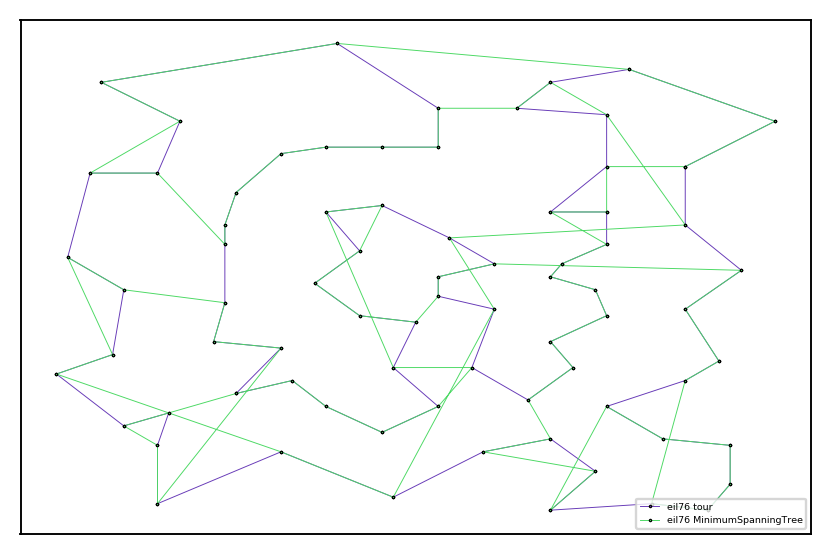

In [115]:
plot_tour_by_testname_and_solution('eil76', 'MinimumSpanningTree')

/Users/gwyrwch/Projects/course-work-5/results/st70_BranchAndBound_3.tour /Users/gwyrwch/Projects/course-work-5/datasets/st70.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/st70.tsp
size  70 0
size  70 70
res ~=  805


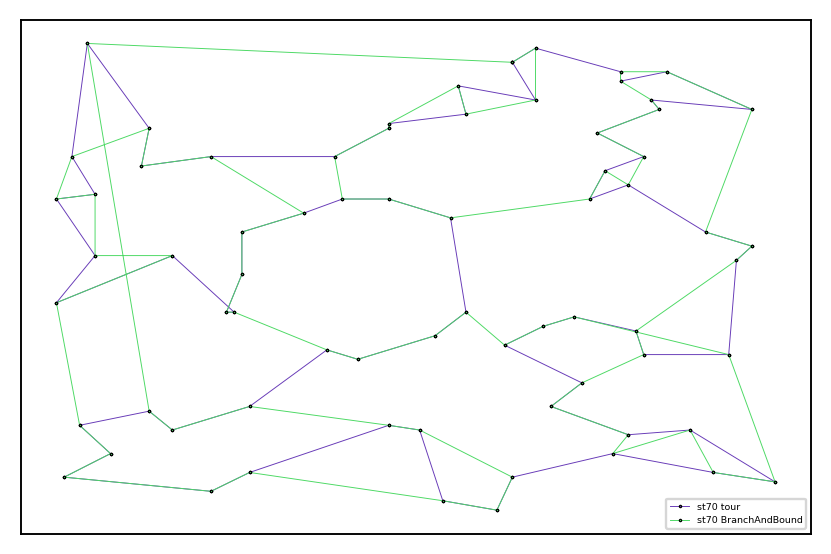

In [116]:
plot_tour_by_testname_and_solution('st70', 'BranchAndBound')
 

/Users/gwyrwch/Projects/course-work-5/results/rd100_GeneticAlgorithm_1.tour /Users/gwyrwch/Projects/course-work-5/datasets/rd100.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/rd100.tsp
size  100 0
size  100 100
res ~=  9263


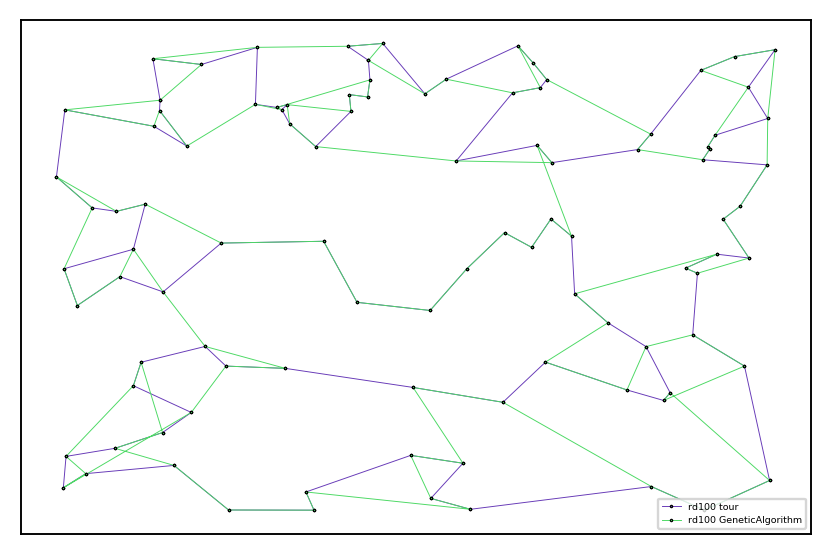

In [117]:
plot_tour_by_testname_and_solution('rd100', 'GeneticAlgorithm')


/Users/gwyrwch/Projects/course-work-5/results/pr2392_GeneticAlgorithm_1.tour /Users/gwyrwch/Projects/course-work-5/datasets/pr2392.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/pr2392.tsp
size  2392 0
size  2392 2392
res ~=  555261


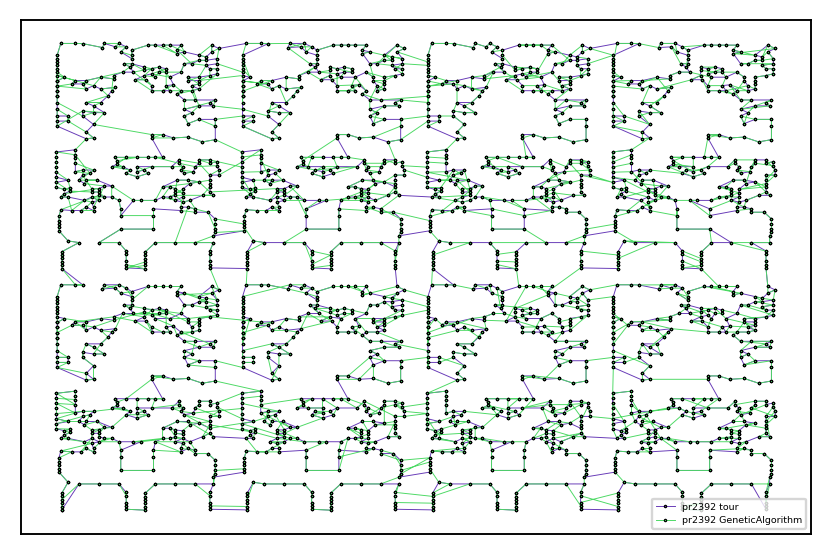

In [118]:
plot_tour_by_testname_and_solution('pr2392', 'GeneticAlgorithm')

/Users/gwyrwch/Projects/course-work-5/results/ulysses22_GeneticAlgorithm_1.tour /Users/gwyrwch/Projects/course-work-5/datasets/ulysses22.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/ulysses22.tsp
size  22 0
size  22 22
res ~=  73


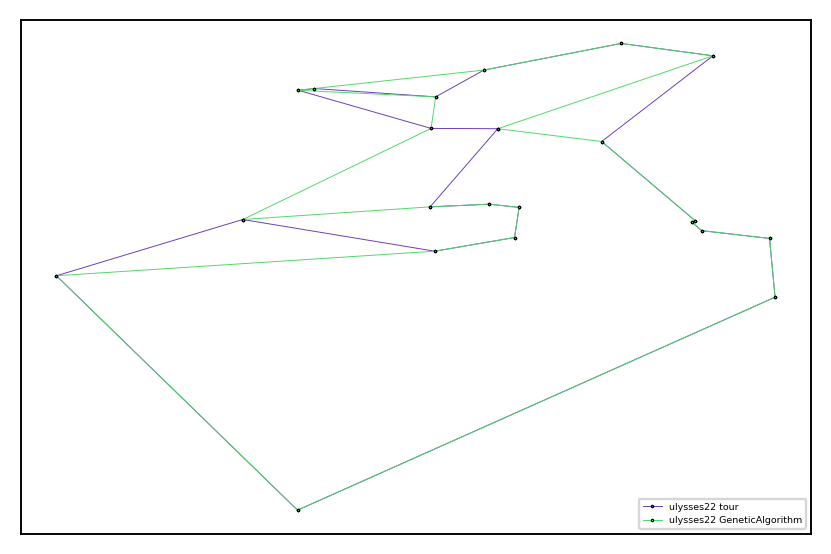

In [119]:
plot_tour_by_testname_and_solution('ulysses22', 'GeneticAlgorithm')

/Users/gwyrwch/Projects/course-work-5/results/gr120_GeneticAlgorithm_1.tour /Users/gwyrwch/Projects/course-work-5/datasets/gr120.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/gr120.tsp
size  120 0
size  120 120
res ~=  1988


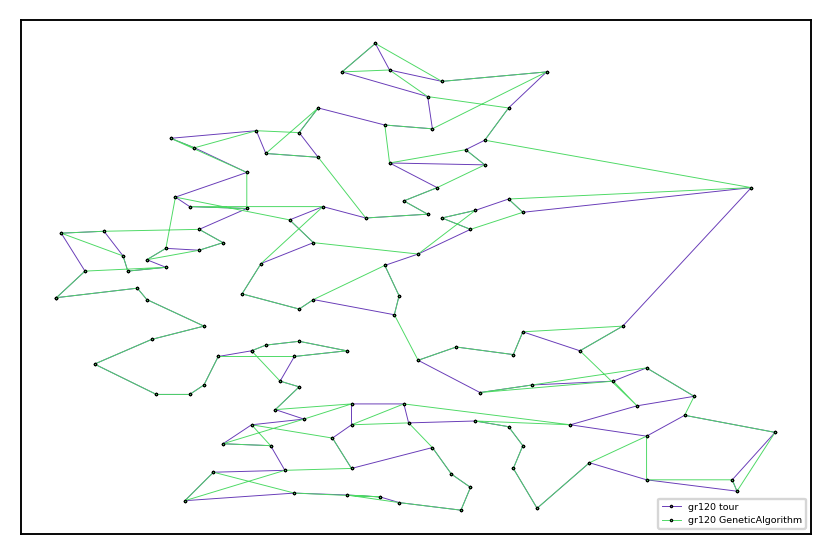

In [120]:
plot_tour_by_testname_and_solution('gr120', 'GeneticAlgorithm')

/Users/gwyrwch/Projects/course-work-5/results/kroA100_NearestNeighbour_5.tour /Users/gwyrwch/Projects/course-work-5/datasets/kroA100.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/kroA100.tsp
size  100 0
size  100 100
res ~=  21406


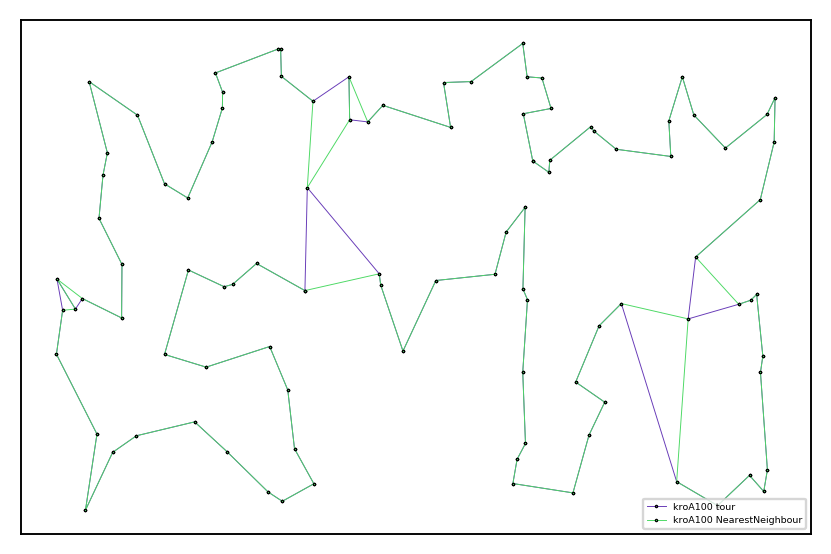

In [121]:
plot_tour_by_testname_and_solution('kroA100', 'NearestNeighbour')

In [ ]:
print(2 in range(1,4))